### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Data Ingestion

In [2]:
data = pd.read_excel(r"D:\The Sparks Foundation Internship\Data Analysis Task 1\Dataset\SampleSuperstore.xlsx")

### Data Overview

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe().round()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.0,9994.0,9994.0,9994.0,9994.0
mean,55190.0,230.0,4.0,0.0,29.0
std,32064.0,623.0,2.0,0.0,234.0
min,1040.0,0.0,1.0,0.0,-6600.0
25%,23223.0,17.0,2.0,0.0,2.0
50%,56430.0,54.0,3.0,0.0,9.0
75%,90008.0,210.0,5.0,0.0,29.0
max,99301.0,22638.0,14.0,1.0,8400.0


### Data Cleaning

#### • Convert ' Discount ' column from Float into Int.

In [7]:
data["Discount"] = data["Discount"].astype(float).astype(int)

In [8]:
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0,6.8714


#### • Convert ' Postal Code ' column data type into object instead of integar.

In [9]:
data["Postal Code"] = data["Postal Code"].astype(int).astype(str)

In [10]:
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0,6.8714


 ### Data Exploration ( EDA )

#### • Find out the weak areas where you can work to make more profit 

In [11]:
neg_profit = data[data["Profit"] < 0].sort_values(by = "Profit", ascending = True)

In [12]:
neg_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Technology,Accessories,27.552,3,0,-0.3444
7413,Standard Class,Home Office,United States,Tigard,Oregon,97224,West,Furniture,Furnishings,13.592,1,0,-0.3398
1566,First Class,Consumer,United States,Allen,Texas,75002,Central,Technology,Accessories,21.480,3,0,-0.2685
1496,Standard Class,Consumer,United States,Coppell,Texas,75019,Central,Office Supplies,Storage,16.784,1,0,-0.2098


In [13]:
for city in neg_profit["City"].unique():
    print(city)

Lancaster
Burlington
San Antonio
Louisville
Chicago
Newark
Houston
Concord
Jacksonville
Philadelphia
Memphis
Dallas
Clarksville
Miami
Knoxville
Columbia
Medina
Charlotte
Pueblo
Springfield
Bethlehem
Nashville
Phoenix
Colorado Springs
Round Rock
Lorain
Rockford
Greenville
New York City
Oswego
Aurora
Carrollton
Yuma
Marion
Waco
Bloomington
Dublin
Fort Lauderdale
Pasadena
Columbus
Troy
Denver
Amarillo
Long Beach
Hialeah
San Francisco
Scottsdale
Decatur
Tyler
Park Ridge
Wheeling
Franklin
Skokie
Yonkers
Salem
Austin
Lakeland
Portland
Reading
Toledo
Jackson
Tampa
Cleveland
Fort Collins
Lakewood
Huntsville
Tucson
Los Angeles
Rochester
Mesa
Tamarac
Greensboro
Mentor
Mcallen
Gilbert
Buffalo Grove
Parker
Champaign
Des Plaines
Pharr
Elmhurst
El Paso
Tigard
Allentown
Naperville
Pembroke Pines
Oceanside
Irving
Plano
Laredo
Richardson
Gastonia
Freeport
Bryan
Arlington
Cranston
Highland Park
Fort Worth
Fairfield
Redmond
Bristol
Normal
North Las Vegas
Dover
San Diego
Littleton
Pomona
Eugene
Carol Stre

#### • Calc the percentage of week areas of all

In [14]:
len(data["City"].unique())

531

In [15]:
len(neg_profit["City"].unique())

229

In [16]:
week_areas_per = (229 / 531) * 100

In [17]:
np.round(week_areas_per, 2)

43.13

#### • Sales

#### •• Total Sales for each Ship Mode

In [18]:
data.groupby(by = "Ship Mode")["Sales"].sum().round(2).sort_values()

Ship Mode
Same Day           128363.12
First Class        351428.42
Second Class       459193.57
Standard Class    1358215.74
Name: Sales, dtype: float64

#### •• Total Sales for each Segment in each Ship Mode

In [19]:
data.groupby(by = ["Ship Mode", "Segment"])["Sales"].sum().round(2)

Ship Mode       Segment    
First Class     Consumer       159168.96
                Corporate      105858.47
                Home Office     86400.99
Same Day        Consumer        60596.36
                Corporate       45121.32
                Home Office     22645.44
Second Class    Consumer       231498.95
                Corporate      146126.04
                Home Office     81568.58
Standard Class  Consumer       710137.07
                Corporate      409040.54
                Home Office    239038.14
Name: Sales, dtype: float64

#### •• Total Sales for each Category

In [20]:
data.groupby(by = "Category")["Sales"].sum().round(2).sort_values()

Category
Office Supplies    719047.03
Furniture          741999.80
Technology         836154.03
Name: Sales, dtype: float64

#### •• Total Sales for each Sub Category in each Category

In [21]:
data.groupby(by = ["Category", "Sub-Category"])["Sales"].sum().round(2)

Category         Sub-Category
Furniture        Bookcases       114880.00
                 Chairs          328449.10
                 Furnishings      91705.16
                 Tables          206965.53
Office Supplies  Appliances      107532.16
                 Art              27118.79
                 Binders         203412.73
                 Envelopes        16476.40
                 Fasteners         3024.28
                 Labels           12486.31
                 Paper            78479.21
                 Storage         223843.61
                 Supplies         46673.54
Technology       Accessories     167380.32
                 Copiers         149528.03
                 Machines        189238.63
                 Phones          330007.05
Name: Sales, dtype: float64

#### •• Show the Quantity of each Sub Category in each Category

In [22]:
data.groupby(by = ["Category", "Sub-Category"])["Quantity"].sum().round(2)

Category         Sub-Category
Furniture        Bookcases        868
                 Chairs          2356
                 Furnishings     3563
                 Tables          1241
Office Supplies  Appliances      1729
                 Art             3000
                 Binders         5974
                 Envelopes        906
                 Fasteners        914
                 Labels          1400
                 Paper           5178
                 Storage         3158
                 Supplies         647
Technology       Accessories     2976
                 Copiers          234
                 Machines         440
                 Phones          3289
Name: Quantity, dtype: int64

#### • Max & Min Sales

#### •• Max Sales

In [23]:
data[data["Sales"] == data["Sales"].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0,-1811.0784


#### •• Min Sales

In [24]:
data[data["Sales"] == data["Sales"].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0,-1.11


#### • Max Profit & Min Profit

#### •• Max Profit

In [25]:
data[data["Profit"] == data["Profit"].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0,8399.976


#### •• Min Profit

In [26]:
data[data["Profit"] == data["Profit"].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0,-6599.978


### Data Visualization

#### • Each ship mode Sales and show its percentage of all

In [27]:
ship_modes = ["Same Mode",  "First Class", "Second Class", "Standard Class"]
ship_modes_sales = [128363.12, 351428.42, 459193.57, 1358215.74]
colors = ["#C85250", "#E5C101", "#E5C101", "#18A558"]

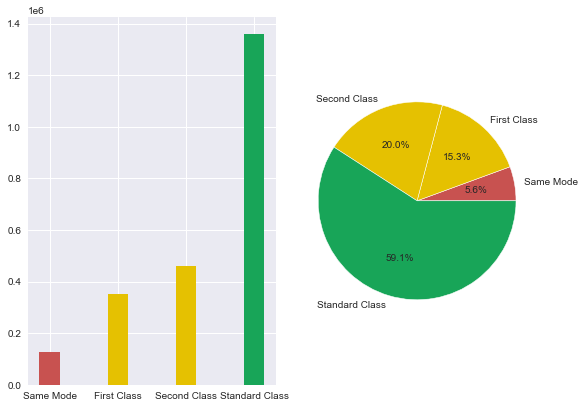

In [28]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].bar(ship_modes, ship_modes_sales, width = .3, color = colors)
ax[1].pie(ship_modes_sales, labels = ship_modes, colors = colors, autopct = "%1.1f%%",startangle = 0, wedgeprops = {"edgecolor":"white", "linewidth":0.5})
fig.tight_layout(pad = 0.1)
plt.show()

#### • More ship mode details ( Each Ship mode segement sales )

In [29]:
segment = ["Consumer", "Corporate", "Home Office"]
first_class_seg_sales = [159168.96, 105858.47, 105858.47]
same_day_seg_sales = [60596.36, 45121.32, 22645.44]
second_class_seg_sales = [231498.95, 146126.04, 81568.58]
standard_class_seg_sales = [710137.07, 409040.54, 239038.14]

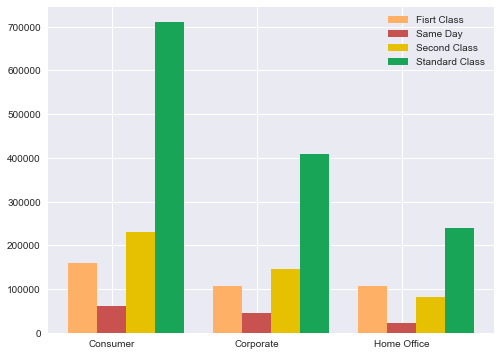

In [30]:
plt.style.use("seaborn")
plt.figure(figsize = (8, 6))
index = np.arange(len(segment))
width = 0.2
plt.bar(index, first_class_seg_sales, width = width, color = "#FFB067", label = "Fisrt Class")
plt.bar(index + width, same_day_seg_sales, width = width, color = "#C85250", label = "Same Day")
plt.bar(index + (2 * width), second_class_seg_sales, width = width, color = "#E5C101", label = "Second Class")
plt.bar(index + (3 * width), standard_class_seg_sales, width = width, color = "#18A558", label = "Standard Class")
plt.xticks(index + width, segment)
plt.legend()
plt.show()

#### • Each Category Sales

In [31]:
categories = ["Office Supplies", "Furniture","Technology"]
cat_sales = [719047.03, 741999.80, 836154.03]        
colors = ["#B2D2A4", "#88CA5E", "#18A558"]

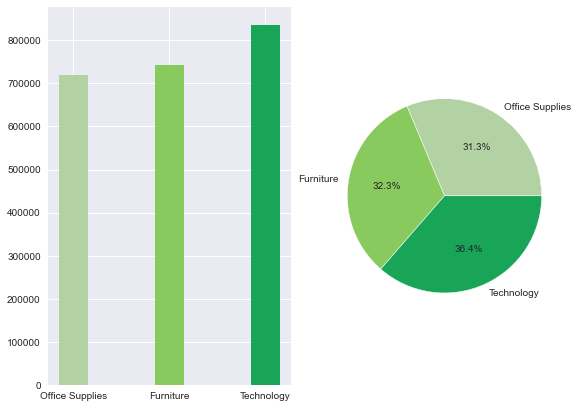

In [32]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].bar(categories, cat_sales, width = .3, color = colors)
ax[1].pie(cat_sales, labels = categories, colors = colors, autopct = "%1.1f%%",startangle = 0, wedgeprops = {"edgecolor":"white", "linewidth":0.5})
fig.tight_layout(pad = 0.1)
plt.show()

#### • More categories details ( Each sub category sales in each category )

In [33]:
fur_subcat = ["Bookcases", "Chairs", "Furnishings", "Tables"]
fur_subcat_sales = [114880.00, 328449.10, 91705.16, 206965.53]
office_subcat = ["Appliances", "Art", "Binders", "Envelopes", "Fasteners", "Labels", "Paper", "Storage", "Supplies"]
office_subcat_sales = [107532.16, 27118.79, 203412.73, 16476.40, 3024.28, 12486.31, 78479.21, 223843.61, 46673.54]
tech_subcat = ["Accessories", "Copiers", "Machines", "Phones"]
tech_subcat_sales = [167380.32, 149528.03, 189238.63, 330007.05]
colors = ["#C85250", "#E5C101", "#E5C101", "#18A558"]
c1 = ["#E5C101", "#18A558","#C85250", "#E5C101"]
c2 = ["#E5C101", "#C85250", "#18A558", "#C85250", "#C85250", "#C85250", "#E5C101", "#18A558", "#E5C101"]
c3 = ["#E5C101", "#E5C101", "#E5C101","#18A558"]

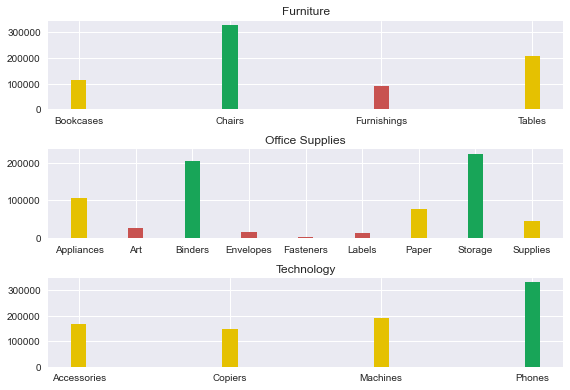

In [34]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 3, ncols = 1)
ax[0].bar(fur_subcat, fur_subcat_sales, width = .1, color = c1)
ax[0].set_title("Furniture")
ax[1].bar(office_subcat, office_subcat_sales, width = .27, color = c2)
ax[1].set_title("Office Supplies")
ax[2].bar(tech_subcat, tech_subcat_sales, width = .1, color = c3)
ax[2].set_title("Technology")
fig.tight_layout(pad = 1)
plt.show()

#### • More categories details ( Each sub category quantity in each category )

In [35]:
fur_subcat = ["Bookcases", "Chairs", "Furnishings", "Tables"]
fur_subcat_quan = [868, 2356, 3563, 1241]
office_subcat = ["Appliances", "Art", "Binders", "Envelopes", "Fasteners", "Labels", "Paper", "Storage", "Supplies"]
office_subcat_quan = [1729, 3000, 5974, 906, 906, 1400, 5178, 3158, 647]
tech_subcat = ["Accessories", "Copiers", "Machines", "Phones"]
tech_subcat_quan = [2976, 234, 440, 3289]
c4 = ["#C85250" , "#E5C101", "#18A558", "#E5C101"]
c5 = ["#C85250", "#E5C101", "#18A558", "#C85250", "#C85250", "#C85250", "#18A558", "#E5C101", "#C85250"]
c6 = ["#18A558", "#C85250", "#C85250", "#18A558"]

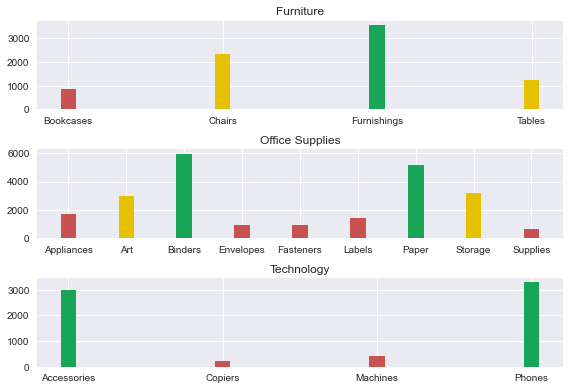

In [36]:
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 3, ncols = 1)
ax[0].bar(fur_subcat, fur_subcat_quan, width = .1, color = c4)
ax[0].set_title("Furniture")
ax[1].bar(office_subcat, office_subcat_quan, width = .27, color = c5)
ax[1].set_title("Office Supplies")
ax[2].bar(tech_subcat, tech_subcat_quan, width = .1, color = c6)
ax[2].set_title("Technology")
fig.tight_layout(pad = 1)
plt.show()

#### • Relation between sales & quantities

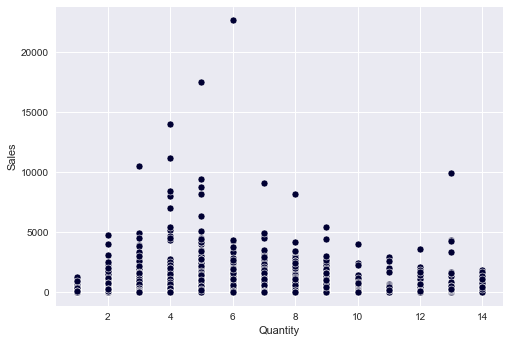

In [37]:
plt.style.use("seaborn")
sns.scatterplot(x = data["Quantity"], y = data["Sales"], color = "#000033")
plt.show()

#### • Relation between sales & profit

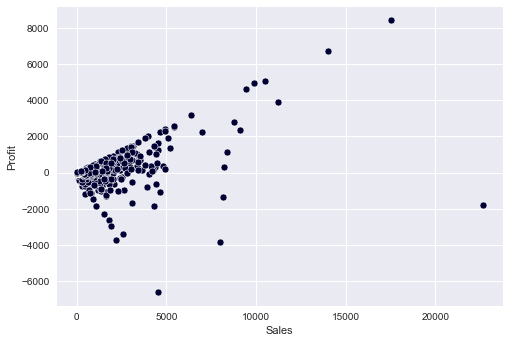

In [38]:
plt.style.use("seaborn")
sns.scatterplot(x = data["Sales"], y = data["Profit"], color = "#000033")
plt.show()

#### • Relation between sales & discount

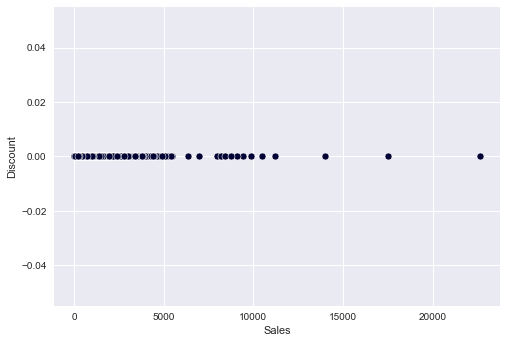

In [39]:
plt.style.use("seaborn")
sns.scatterplot(x = data["Sales"], y = data["Discount"], color = "#000033")
plt.show()

### Business problems :
#### • There are 43.13% of total areas have negative profit.
#### • There is a difference between ship mode ( Standard is the best ).
#### • Company should try to increase discounts to increase sales.
#### • There is a disparity between cities in terms of the amount of sales , profit and other things.
